Image Classification using Deep Learning
Author: Allmin Susaiyah

Name of student:

In this notebook, image classification using deep learning is covered. shift + Enter will excecute each cell

In [1]:
from keras.datasets import mnist

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from PIL import Image
from glob import glob
from tqdm import tqdm

In [3]:
if not os.path.exists('result_images'):
    os.makedirs('result_images')
if os.path.exists('input_images'):
    shutil.rmtree('input_images')
os.makedirs('input_images')

In [4]:
#Acquiring data and assigning them into folders
Total_Images = 70000
if len(glob("input_images/*/*/*.png")) < Total_Images:
    print("aquiring dataset")
    (x_train, y_train), (x_val, y_val) = mnist.load_data()
    
    for ind,(im,y) in tqdm(enumerate(zip(x_train, y_train))):
        IM = Image.fromarray(im)
        op_dir = "input_images/train/{}/".format(y)
        if not os.path.exists(op_dir):
            os.makedirs(op_dir)
        IM.save(op_dir + "image_{:06d}.png".format(ind))


    for ind,(im,y) in tqdm(enumerate(zip(x_val, y_val))):
        IM = Image.fromarray(im)
        op_dir = "input_images/validation/{}/".format(y)
        if not os.path.exists(op_dir):
            os.makedirs(op_dir)
        IM.save(op_dir + "image_{:06d}.png".format(ind))

    

aquiring dataset


60000it [02:49, 353.38it/s]
10000it [00:26, 383.47it/s]


In [5]:
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# loading images
list_all_images = glob("input_images/*/*/*.*")
x_train = []; y_train = []; x_val = []; y_val = []
for ind,image_path in tqdm(enumerate(list_all_images)):
    mode,label,file_name = image_path.split(os.path.sep)[-3:]
    label = int(label)
    
    im = np.array(Image.open(image_path))
    if mode == 'train':
        x_train.append(im)
        y_train.append(label)
    elif mode == 'validation':
        x_val.append(im)
        y_val.append(label)
        
x_train = np.array(x_train)
x_val = np.array(x_val)
# (x_train, y_train), (x_val, y_test) = mnist.load_data()


70000it [12:39, 92.22it/s] 


In [20]:
print(len(y_train))
x_train[0].shape
# [img_rows, img_cols] = x_train.shape[1:3]

60000


(28, 28, 1)

In [7]:
# import requests
# requests.packages.urllib3.disable_warnings()
# import ssl
# try:
#    _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#    # Legacy Python that doesn't verify HTTPS certificates by default
#    pass
# else:
#    # Handle target environment that doesn't support HTTPS verification
#    ssl._create_default_https_context = _create_unverified_https_context

In [8]:
#preprocessing
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
model.summary()
# my_callbacks = [keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/12


186/469 [==========>...................] - ETA: 0s - loss: 2.3123 - accuracy: 0.14 - ETA: 1:06 - loss: 2.3100 - accuracy: 0.12 - ETA: 1:29 - loss: 2.3119 - accuracy: 0.12 - ETA: 1:39 - loss: 2.3106 - accuracy: 0.13 - ETA: 1:44 - loss: 2.3166 - accuracy: 0.12 - ETA: 1:49 - loss: 2.3149 - accuracy: 0.12 - ETA: 1:53 - loss: 2.3136 - accuracy: 0.12 - ETA: 1:53 - loss: 2.3144 - accuracy: 0.11 - ETA: 1:52 - loss: 2.3133 - accuracy: 0.11 - ETA: 1:52 - loss: 2.3148 - accuracy: 0.11 - ETA: 1:53 - loss: 2.3151 - accuracy: 0.11 - ETA: 1:54 - loss: 2.3151 - accuracy: 0.11 - ETA: 1:55 - loss: 2.3141 - accuracy: 0.11 - ETA: 1:54 - loss: 2.3136 - accuracy: 0.11 - ETA: 1:54 - loss: 2.3141 - accuracy: 0.11 - ETA: 1:54 - loss: 2.3135 - accuracy: 0.10 - ETA: 1:55 - loss: 2.3133 - accuracy: 0.11 - ETA: 1:55 - loss: 2.3122 - accuracy: 0.11 - ETA: 1:55 - loss: 2.3124 - accuracy: 0.11 - ETA: 1:54 - loss: 2.3135 - accuracy: 0.11 - ETA: 1:55 - loss: 2.3130 - accuracy: 0.10 - ETA: 1:55 - loss: 2.3138 - accuracy

372/469 [======================>.......] - ETA: 1:16 - loss: 2.3030 - accuracy: 0.11 - ETA: 1:16 - loss: 2.3029 - accuracy: 0.11 - ETA: 1:16 - loss: 2.3027 - accuracy: 0.12 - ETA: 1:15 - loss: 2.3027 - accuracy: 0.12 - ETA: 1:15 - loss: 2.3028 - accuracy: 0.12 - ETA: 1:15 - loss: 2.3027 - accuracy: 0.12 - ETA: 1:15 - loss: 2.3027 - accuracy: 0.12 - ETA: 1:14 - loss: 2.3026 - accuracy: 0.12 - ETA: 1:14 - loss: 2.3025 - accuracy: 0.12 - ETA: 1:14 - loss: 2.3023 - accuracy: 0.12 - ETA: 1:13 - loss: 2.3023 - accuracy: 0.12 - ETA: 1:13 - loss: 2.3022 - accuracy: 0.12 - ETA: 1:13 - loss: 2.3022 - accuracy: 0.12 - ETA: 1:13 - loss: 2.3020 - accuracy: 0.12 - ETA: 1:12 - loss: 2.3019 - accuracy: 0.12 - ETA: 1:12 - loss: 2.3018 - accuracy: 0.12 - ETA: 1:12 - loss: 2.3018 - accuracy: 0.12 - ETA: 1:11 - loss: 2.3016 - accuracy: 0.12 - ETA: 1:11 - loss: 2.3016 - accuracy: 0.12 - ETA: 1:11 - loss: 2.3016 - accuracy: 0.12 - ETA: 1:11 - loss: 2.3014 - accuracy: 0.12 - ETA: 1:10 - loss: 2.3014 - accura

469/469 [==============================] - ETA: 26s - loss: 2.2917 - accuracy: 0.135 - ETA: 25s - loss: 2.2916 - accuracy: 0.136 - ETA: 25s - loss: 2.2916 - accuracy: 0.136 - ETA: 25s - loss: 2.2915 - accuracy: 0.136 - ETA: 25s - loss: 2.2914 - accuracy: 0.136 - ETA: 24s - loss: 2.2913 - accuracy: 0.136 - ETA: 24s - loss: 2.2913 - accuracy: 0.136 - ETA: 24s - loss: 2.2913 - accuracy: 0.136 - ETA: 24s - loss: 2.2912 - accuracy: 0.136 - ETA: 23s - loss: 2.2912 - accuracy: 0.136 - ETA: 23s - loss: 2.2911 - accuracy: 0.137 - ETA: 23s - loss: 2.2911 - accuracy: 0.137 - ETA: 22s - loss: 2.2910 - accuracy: 0.137 - ETA: 22s - loss: 2.2909 - accuracy: 0.137 - ETA: 22s - loss: 2.2908 - accuracy: 0.137 - ETA: 22s - loss: 2.2907 - accuracy: 0.138 - ETA: 21s - loss: 2.2906 - accuracy: 0.138 - ETA: 21s - loss: 2.2906 - accuracy: 0.138 - ETA: 21s - loss: 2.2905 - accuracy: 0.138 - ETA: 21s - loss: 2.2905 - accuracy: 0.138 - ETA: 20s - loss: 2.2905 - accuracy: 0.138 - ETA: 20s - loss: 2.2904 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 2.2770 - accuracy: 0.22 - ETA: 1:05 - loss: 2.2686 - accuracy: 0.22 - ETA: 1:25 - loss: 2.2655 - accuracy: 0.21 - ETA: 1:36 - loss: 2.2648 - accuracy: 0.20 - ETA: 1:40 - loss: 2.2616 - accuracy: 0.21 - ETA: 1:43 - loss: 2.2610 - accuracy: 0.20 - ETA: 1:45 - loss: 2.2611 - accuracy: 0.20 - ETA: 1:45 - loss: 2.2600 - accuracy: 0.21 - ETA: 1:48 - loss: 2.2597 - accuracy: 0.20 - ETA: 1:48 - loss: 2.2594 - accuracy: 0.20 - ETA: 1:49 - loss: 2.2579 - accuracy: 0.21 - ETA: 1:51 - loss: 2.2556 - accuracy: 0.21 - ETA: 1:51 - loss: 2.2551 - accuracy: 0.21 - ETA: 1:52 - loss: 2.2550 - accuracy: 0.21 - ETA: 1:52 - loss: 2.2544 - accuracy: 0.20 - ETA: 1:52 - loss: 2.2544 - accuracy: 0.20 - ETA: 1:52 - loss: 2.2553 - accuracy: 0.20 - ETA: 1:51 - loss: 2.2544 - accuracy: 0.21 - ETA: 1:51 - loss: 2.2550 - accuracy: 0.20 - ETA: 1:52 - loss: 2.2552 - accuracy: 0.20 - ETA: 1:52 - loss: 2.2540 - accuracy: 0.20 - ETA: 1:53 - loss: 2.2537 - accuracy

372/469 [======================>.......] - ETA: 1:16 - loss: 2.2462 - accuracy: 0.21 - ETA: 1:16 - loss: 2.2461 - accuracy: 0.21 - ETA: 1:16 - loss: 2.2460 - accuracy: 0.21 - ETA: 1:16 - loss: 2.2460 - accuracy: 0.21 - ETA: 1:15 - loss: 2.2459 - accuracy: 0.21 - ETA: 1:15 - loss: 2.2457 - accuracy: 0.21 - ETA: 1:15 - loss: 2.2457 - accuracy: 0.21 - ETA: 1:15 - loss: 2.2457 - accuracy: 0.21 - ETA: 1:14 - loss: 2.2457 - accuracy: 0.21 - ETA: 1:14 - loss: 2.2457 - accuracy: 0.21 - ETA: 1:14 - loss: 2.2457 - accuracy: 0.21 - ETA: 1:13 - loss: 2.2456 - accuracy: 0.21 - ETA: 1:13 - loss: 2.2454 - accuracy: 0.21 - ETA: 1:13 - loss: 2.2454 - accuracy: 0.21 - ETA: 1:13 - loss: 2.2453 - accuracy: 0.21 - ETA: 1:12 - loss: 2.2453 - accuracy: 0.21 - ETA: 1:12 - loss: 2.2452 - accuracy: 0.21 - ETA: 1:12 - loss: 2.2452 - accuracy: 0.21 - ETA: 1:11 - loss: 2.2452 - accuracy: 0.21 - ETA: 1:11 - loss: 2.2451 - accuracy: 0.21 - ETA: 1:11 - loss: 2.2451 - accuracy: 0.21 - ETA: 1:11 - loss: 2.2450 - accura

469/469 [==============================] - ETA: 26s - loss: 2.2348 - accuracy: 0.234 - ETA: 25s - loss: 2.2348 - accuracy: 0.234 - ETA: 25s - loss: 2.2347 - accuracy: 0.234 - ETA: 25s - loss: 2.2347 - accuracy: 0.234 - ETA: 24s - loss: 2.2346 - accuracy: 0.234 - ETA: 24s - loss: 2.2345 - accuracy: 0.234 - ETA: 24s - loss: 2.2344 - accuracy: 0.234 - ETA: 24s - loss: 2.2344 - accuracy: 0.234 - ETA: 23s - loss: 2.2343 - accuracy: 0.234 - ETA: 23s - loss: 2.2343 - accuracy: 0.235 - ETA: 23s - loss: 2.2342 - accuracy: 0.235 - ETA: 23s - loss: 2.2341 - accuracy: 0.235 - ETA: 22s - loss: 2.2341 - accuracy: 0.235 - ETA: 22s - loss: 2.2340 - accuracy: 0.235 - ETA: 22s - loss: 2.2339 - accuracy: 0.235 - ETA: 21s - loss: 2.2339 - accuracy: 0.235 - ETA: 21s - loss: 2.2338 - accuracy: 0.235 - ETA: 21s - loss: 2.2338 - accuracy: 0.235 - ETA: 21s - loss: 2.2338 - accuracy: 0.235 - ETA: 20s - loss: 2.2337 - accuracy: 0.235 - ETA: 20s - loss: 2.2337 - accuracy: 0.235 - ETA: 20s - loss: 2.2336 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 2.1755 - accuracy: 0.29 - ETA: 59s - loss: 2.1935 - accuracy: 0.289 - ETA: 1:20 - loss: 2.1966 - accuracy: 0.27 - ETA: 1:30 - loss: 2.2000 - accuracy: 0.27 - ETA: 1:35 - loss: 2.1975 - accuracy: 0.28 - ETA: 1:40 - loss: 2.1983 - accuracy: 0.27 - ETA: 1:42 - loss: 2.1980 - accuracy: 0.28 - ETA: 1:45 - loss: 2.1973 - accuracy: 0.28 - ETA: 1:46 - loss: 2.1982 - accuracy: 0.28 - ETA: 1:47 - loss: 2.1991 - accuracy: 0.28 - ETA: 1:48 - loss: 2.1998 - accuracy: 0.27 - ETA: 1:49 - loss: 2.1995 - accuracy: 0.28 - ETA: 1:49 - loss: 2.1965 - accuracy: 0.29 - ETA: 1:50 - loss: 2.1958 - accuracy: 0.28 - ETA: 1:51 - loss: 2.1938 - accuracy: 0.29 - ETA: 1:51 - loss: 2.1946 - accuracy: 0.29 - ETA: 1:51 - loss: 2.1949 - accuracy: 0.29 - ETA: 1:52 - loss: 2.1953 - accuracy: 0.29 - ETA: 1:51 - loss: 2.1954 - accuracy: 0.29 - ETA: 1:51 - loss: 2.1952 - accuracy: 0.29 - ETA: 1:51 - loss: 2.1951 - accuracy: 0.29 - ETA: 1:51 - loss: 2.1951 - accuracy

372/469 [======================>.......] - ETA: 1:15 - loss: 2.1851 - accuracy: 0.30 - ETA: 1:14 - loss: 2.1851 - accuracy: 0.30 - ETA: 1:14 - loss: 2.1849 - accuracy: 0.30 - ETA: 1:14 - loss: 2.1848 - accuracy: 0.30 - ETA: 1:14 - loss: 2.1847 - accuracy: 0.30 - ETA: 1:13 - loss: 2.1846 - accuracy: 0.30 - ETA: 1:13 - loss: 2.1845 - accuracy: 0.30 - ETA: 1:13 - loss: 2.1846 - accuracy: 0.30 - ETA: 1:13 - loss: 2.1845 - accuracy: 0.30 - ETA: 1:12 - loss: 2.1843 - accuracy: 0.30 - ETA: 1:12 - loss: 2.1842 - accuracy: 0.30 - ETA: 1:12 - loss: 2.1842 - accuracy: 0.30 - ETA: 1:11 - loss: 2.1842 - accuracy: 0.30 - ETA: 1:11 - loss: 2.1842 - accuracy: 0.30 - ETA: 1:11 - loss: 2.1844 - accuracy: 0.30 - ETA: 1:11 - loss: 2.1844 - accuracy: 0.30 - ETA: 1:10 - loss: 2.1844 - accuracy: 0.30 - ETA: 1:10 - loss: 2.1844 - accuracy: 0.30 - ETA: 1:10 - loss: 2.1843 - accuracy: 0.30 - ETA: 1:10 - loss: 2.1842 - accuracy: 0.30 - ETA: 1:09 - loss: 2.1842 - accuracy: 0.30 - ETA: 1:09 - loss: 2.1841 - accura

469/469 [==============================] - ETA: 25s - loss: 2.1706 - accuracy: 0.321 - ETA: 25s - loss: 2.1706 - accuracy: 0.321 - ETA: 25s - loss: 2.1705 - accuracy: 0.321 - ETA: 24s - loss: 2.1704 - accuracy: 0.321 - ETA: 24s - loss: 2.1703 - accuracy: 0.321 - ETA: 24s - loss: 2.1703 - accuracy: 0.321 - ETA: 23s - loss: 2.1702 - accuracy: 0.321 - ETA: 23s - loss: 2.1701 - accuracy: 0.321 - ETA: 23s - loss: 2.1699 - accuracy: 0.321 - ETA: 23s - loss: 2.1698 - accuracy: 0.322 - ETA: 22s - loss: 2.1698 - accuracy: 0.322 - ETA: 22s - loss: 2.1697 - accuracy: 0.322 - ETA: 22s - loss: 2.1696 - accuracy: 0.322 - ETA: 22s - loss: 2.1696 - accuracy: 0.322 - ETA: 21s - loss: 2.1695 - accuracy: 0.322 - ETA: 21s - loss: 2.1694 - accuracy: 0.322 - ETA: 21s - loss: 2.1694 - accuracy: 0.322 - ETA: 21s - loss: 2.1693 - accuracy: 0.323 - ETA: 20s - loss: 2.1692 - accuracy: 0.323 - ETA: 20s - loss: 2.1692 - accuracy: 0.323 - ETA: 20s - loss: 2.1691 - accuracy: 0.323 - ETA: 20s - loss: 2.1690 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 2.1011 - accuracy: 0.41 - ETA: 1:04 - loss: 2.1126 - accuracy: 0.39 - ETA: 1:22 - loss: 2.1226 - accuracy: 0.37 - ETA: 1:31 - loss: 2.1264 - accuracy: 0.37 - ETA: 1:35 - loss: 2.1247 - accuracy: 0.37 - ETA: 1:39 - loss: 2.1251 - accuracy: 0.38 - ETA: 1:40 - loss: 2.1249 - accuracy: 0.38 - ETA: 1:43 - loss: 2.1255 - accuracy: 0.38 - ETA: 1:44 - loss: 2.1242 - accuracy: 0.38 - ETA: 1:45 - loss: 2.1240 - accuracy: 0.39 - ETA: 1:47 - loss: 2.1226 - accuracy: 0.39 - ETA: 1:48 - loss: 2.1198 - accuracy: 0.39 - ETA: 1:48 - loss: 2.1198 - accuracy: 0.39 - ETA: 1:49 - loss: 2.1206 - accuracy: 0.38 - ETA: 1:49 - loss: 2.1212 - accuracy: 0.38 - ETA: 1:49 - loss: 2.1224 - accuracy: 0.38 - ETA: 1:49 - loss: 2.1217 - accuracy: 0.38 - ETA: 1:50 - loss: 2.1224 - accuracy: 0.38 - ETA: 1:50 - loss: 2.1222 - accuracy: 0.37 - ETA: 1:50 - loss: 2.1234 - accuracy: 0.37 - ETA: 1:50 - loss: 2.1235 - accuracy: 0.37 - ETA: 1:51 - loss: 2.1227 - accuracy

372/469 [======================>.......] - ETA: 1:15 - loss: 2.1056 - accuracy: 0.39 - ETA: 1:15 - loss: 2.1056 - accuracy: 0.39 - ETA: 1:15 - loss: 2.1056 - accuracy: 0.39 - ETA: 1:14 - loss: 2.1055 - accuracy: 0.39 - ETA: 1:14 - loss: 2.1053 - accuracy: 0.39 - ETA: 1:14 - loss: 2.1053 - accuracy: 0.39 - ETA: 1:13 - loss: 2.1053 - accuracy: 0.39 - ETA: 1:13 - loss: 2.1052 - accuracy: 0.39 - ETA: 1:13 - loss: 2.1052 - accuracy: 0.39 - ETA: 1:13 - loss: 2.1051 - accuracy: 0.39 - ETA: 1:12 - loss: 2.1051 - accuracy: 0.39 - ETA: 1:12 - loss: 2.1051 - accuracy: 0.39 - ETA: 1:12 - loss: 2.1050 - accuracy: 0.39 - ETA: 1:12 - loss: 2.1048 - accuracy: 0.39 - ETA: 1:11 - loss: 2.1048 - accuracy: 0.39 - ETA: 1:11 - loss: 2.1047 - accuracy: 0.39 - ETA: 1:11 - loss: 2.1045 - accuracy: 0.39 - ETA: 1:10 - loss: 2.1044 - accuracy: 0.39 - ETA: 1:10 - loss: 2.1044 - accuracy: 0.39 - ETA: 1:10 - loss: 2.1044 - accuracy: 0.39 - ETA: 1:10 - loss: 2.1043 - accuracy: 0.39 - ETA: 1:09 - loss: 2.1043 - accura

469/469 [==============================] - ETA: 25s - loss: 2.0888 - accuracy: 0.404 - ETA: 25s - loss: 2.0887 - accuracy: 0.404 - ETA: 25s - loss: 2.0885 - accuracy: 0.404 - ETA: 24s - loss: 2.0885 - accuracy: 0.404 - ETA: 24s - loss: 2.0883 - accuracy: 0.404 - ETA: 24s - loss: 2.0882 - accuracy: 0.405 - ETA: 24s - loss: 2.0882 - accuracy: 0.405 - ETA: 23s - loss: 2.0881 - accuracy: 0.405 - ETA: 23s - loss: 2.0880 - accuracy: 0.405 - ETA: 23s - loss: 2.0880 - accuracy: 0.405 - ETA: 23s - loss: 2.0880 - accuracy: 0.405 - ETA: 22s - loss: 2.0879 - accuracy: 0.405 - ETA: 22s - loss: 2.0878 - accuracy: 0.405 - ETA: 22s - loss: 2.0877 - accuracy: 0.405 - ETA: 21s - loss: 2.0877 - accuracy: 0.405 - ETA: 21s - loss: 2.0875 - accuracy: 0.405 - ETA: 21s - loss: 2.0875 - accuracy: 0.405 - ETA: 21s - loss: 2.0873 - accuracy: 0.406 - ETA: 20s - loss: 2.0872 - accuracy: 0.406 - ETA: 20s - loss: 2.0871 - accuracy: 0.406 - ETA: 20s - loss: 2.0870 - accuracy: 0.406 - ETA: 20s - loss: 2.0868 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 2.0279 - accuracy: 0.46 - ETA: 1:03 - loss: 2.0338 - accuracy: 0.42 - ETA: 1:19 - loss: 2.0392 - accuracy: 0.41 - ETA: 1:29 - loss: 2.0427 - accuracy: 0.41 - ETA: 1:37 - loss: 2.0432 - accuracy: 0.41 - ETA: 1:44 - loss: 2.0391 - accuracy: 0.41 - ETA: 1:49 - loss: 2.0414 - accuracy: 0.40 - ETA: 1:52 - loss: 2.0393 - accuracy: 0.41 - ETA: 1:54 - loss: 2.0410 - accuracy: 0.41 - ETA: 1:55 - loss: 2.0387 - accuracy: 0.42 - ETA: 1:56 - loss: 2.0366 - accuracy: 0.42 - ETA: 1:56 - loss: 2.0385 - accuracy: 0.42 - ETA: 1:56 - loss: 2.0342 - accuracy: 0.43 - ETA: 1:56 - loss: 2.0328 - accuracy: 0.43 - ETA: 1:57 - loss: 2.0307 - accuracy: 0.43 - ETA: 1:58 - loss: 2.0315 - accuracy: 0.43 - ETA: 1:57 - loss: 2.0284 - accuracy: 0.44 - ETA: 1:58 - loss: 2.0299 - accuracy: 0.43 - ETA: 1:59 - loss: 2.0295 - accuracy: 0.44 - ETA: 1:59 - loss: 2.0283 - accuracy: 0.44 - ETA: 1:59 - loss: 2.0272 - accuracy: 0.44 - ETA: 1:58 - loss: 2.0266 - accuracy

372/469 [======================>.......] - ETA: 1:17 - loss: 2.0074 - accuracy: 0.46 - ETA: 1:17 - loss: 2.0073 - accuracy: 0.46 - ETA: 1:17 - loss: 2.0071 - accuracy: 0.46 - ETA: 1:16 - loss: 2.0070 - accuracy: 0.46 - ETA: 1:16 - loss: 2.0067 - accuracy: 0.46 - ETA: 1:16 - loss: 2.0067 - accuracy: 0.46 - ETA: 1:15 - loss: 2.0063 - accuracy: 0.46 - ETA: 1:15 - loss: 2.0059 - accuracy: 0.46 - ETA: 1:15 - loss: 2.0058 - accuracy: 0.46 - ETA: 1:14 - loss: 2.0055 - accuracy: 0.46 - ETA: 1:14 - loss: 2.0054 - accuracy: 0.46 - ETA: 1:14 - loss: 2.0050 - accuracy: 0.46 - ETA: 1:13 - loss: 2.0050 - accuracy: 0.46 - ETA: 1:13 - loss: 2.0049 - accuracy: 0.46 - ETA: 1:13 - loss: 2.0046 - accuracy: 0.46 - ETA: 1:13 - loss: 2.0045 - accuracy: 0.46 - ETA: 1:12 - loss: 2.0044 - accuracy: 0.46 - ETA: 1:12 - loss: 2.0044 - accuracy: 0.46 - ETA: 1:12 - loss: 2.0042 - accuracy: 0.46 - ETA: 1:12 - loss: 2.0042 - accuracy: 0.46 - ETA: 1:11 - loss: 2.0041 - accuracy: 0.46 - ETA: 1:11 - loss: 2.0041 - accura

469/469 [==============================] - ETA: 26s - loss: 1.9826 - accuracy: 0.477 - ETA: 25s - loss: 1.9825 - accuracy: 0.477 - ETA: 25s - loss: 1.9823 - accuracy: 0.477 - ETA: 25s - loss: 1.9822 - accuracy: 0.477 - ETA: 24s - loss: 1.9821 - accuracy: 0.477 - ETA: 24s - loss: 1.9820 - accuracy: 0.477 - ETA: 24s - loss: 1.9819 - accuracy: 0.477 - ETA: 24s - loss: 1.9816 - accuracy: 0.477 - ETA: 23s - loss: 1.9816 - accuracy: 0.477 - ETA: 23s - loss: 1.9815 - accuracy: 0.477 - ETA: 23s - loss: 1.9814 - accuracy: 0.477 - ETA: 23s - loss: 1.9813 - accuracy: 0.477 - ETA: 22s - loss: 1.9811 - accuracy: 0.477 - ETA: 22s - loss: 1.9811 - accuracy: 0.477 - ETA: 22s - loss: 1.9810 - accuracy: 0.477 - ETA: 21s - loss: 1.9809 - accuracy: 0.477 - ETA: 21s - loss: 1.9808 - accuracy: 0.477 - ETA: 21s - loss: 1.9806 - accuracy: 0.477 - ETA: 21s - loss: 1.9804 - accuracy: 0.478 - ETA: 20s - loss: 1.9803 - accuracy: 0.478 - ETA: 20s - loss: 1.9802 - accuracy: 0.478 - ETA: 20s - loss: 1.9799 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.8792 - accuracy: 0.60 - ETA: 1:10 - loss: 1.8954 - accuracy: 0.55 - ETA: 1:30 - loss: 1.9083 - accuracy: 0.53 - ETA: 1:46 - loss: 1.9058 - accuracy: 0.53 - ETA: 1:53 - loss: 1.9117 - accuracy: 0.51 - ETA: 1:57 - loss: 1.9172 - accuracy: 0.50 - ETA: 1:59 - loss: 1.9155 - accuracy: 0.51 - ETA: 2:03 - loss: 1.9164 - accuracy: 0.51 - ETA: 2:04 - loss: 1.9137 - accuracy: 0.51 - ETA: 2:08 - loss: 1.9114 - accuracy: 0.51 - ETA: 2:11 - loss: 1.9116 - accuracy: 0.51 - ETA: 2:13 - loss: 1.9149 - accuracy: 0.51 - ETA: 2:14 - loss: 1.9141 - accuracy: 0.51 - ETA: 2:16 - loss: 1.9133 - accuracy: 0.51 - ETA: 2:17 - loss: 1.9119 - accuracy: 0.51 - ETA: 2:17 - loss: 1.9102 - accuracy: 0.50 - ETA: 2:18 - loss: 1.9111 - accuracy: 0.51 - ETA: 2:20 - loss: 1.9118 - accuracy: 0.51 - ETA: 2:20 - loss: 1.9104 - accuracy: 0.51 - ETA: 2:19 - loss: 1.9114 - accuracy: 0.51 - ETA: 2:19 - loss: 1.9103 - accuracy: 0.51 - ETA: 2:19 - loss: 1.9106 - accuracy

372/469 [======================>.......] - ETA: 1:17 - loss: 1.8813 - accuracy: 0.52 - ETA: 1:17 - loss: 1.8811 - accuracy: 0.52 - ETA: 1:17 - loss: 1.8809 - accuracy: 0.52 - ETA: 1:16 - loss: 1.8807 - accuracy: 0.52 - ETA: 1:16 - loss: 1.8804 - accuracy: 0.52 - ETA: 1:16 - loss: 1.8802 - accuracy: 0.52 - ETA: 1:15 - loss: 1.8803 - accuracy: 0.52 - ETA: 1:15 - loss: 1.8804 - accuracy: 0.52 - ETA: 1:15 - loss: 1.8803 - accuracy: 0.52 - ETA: 1:14 - loss: 1.8803 - accuracy: 0.52 - ETA: 1:14 - loss: 1.8803 - accuracy: 0.52 - ETA: 1:14 - loss: 1.8804 - accuracy: 0.52 - ETA: 1:14 - loss: 1.8803 - accuracy: 0.52 - ETA: 1:13 - loss: 1.8800 - accuracy: 0.52 - ETA: 1:13 - loss: 1.8797 - accuracy: 0.52 - ETA: 1:13 - loss: 1.8797 - accuracy: 0.52 - ETA: 1:12 - loss: 1.8797 - accuracy: 0.52 - ETA: 1:12 - loss: 1.8795 - accuracy: 0.52 - ETA: 1:12 - loss: 1.8791 - accuracy: 0.52 - ETA: 1:12 - loss: 1.8792 - accuracy: 0.52 - ETA: 1:11 - loss: 1.8789 - accuracy: 0.52 - ETA: 1:11 - loss: 1.8787 - accura

469/469 [==============================] - ETA: 26s - loss: 1.8543 - accuracy: 0.534 - ETA: 25s - loss: 1.8541 - accuracy: 0.535 - ETA: 25s - loss: 1.8541 - accuracy: 0.534 - ETA: 25s - loss: 1.8540 - accuracy: 0.534 - ETA: 24s - loss: 1.8536 - accuracy: 0.535 - ETA: 24s - loss: 1.8534 - accuracy: 0.535 - ETA: 24s - loss: 1.8532 - accuracy: 0.535 - ETA: 24s - loss: 1.8530 - accuracy: 0.535 - ETA: 23s - loss: 1.8529 - accuracy: 0.535 - ETA: 23s - loss: 1.8528 - accuracy: 0.535 - ETA: 23s - loss: 1.8527 - accuracy: 0.535 - ETA: 23s - loss: 1.8525 - accuracy: 0.535 - ETA: 22s - loss: 1.8523 - accuracy: 0.535 - ETA: 22s - loss: 1.8521 - accuracy: 0.535 - ETA: 22s - loss: 1.8518 - accuracy: 0.535 - ETA: 21s - loss: 1.8514 - accuracy: 0.535 - ETA: 21s - loss: 1.8514 - accuracy: 0.535 - ETA: 21s - loss: 1.8512 - accuracy: 0.535 - ETA: 21s - loss: 1.8510 - accuracy: 0.536 - ETA: 20s - loss: 1.8508 - accuracy: 0.536 - ETA: 20s - loss: 1.8506 - accuracy: 0.536 - ETA: 20s - loss: 1.8504 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.7813 - accuracy: 0.56 - ETA: 54s - loss: 1.8128 - accuracy: 0.523 - ETA: 1:16 - loss: 1.7830 - accuracy: 0.55 - ETA: 1:27 - loss: 1.7787 - accuracy: 0.55 - ETA: 1:33 - loss: 1.7767 - accuracy: 0.56 - ETA: 1:38 - loss: 1.7757 - accuracy: 0.56 - ETA: 1:42 - loss: 1.7710 - accuracy: 0.56 - ETA: 1:44 - loss: 1.7658 - accuracy: 0.56 - ETA: 1:45 - loss: 1.7664 - accuracy: 0.56 - ETA: 1:46 - loss: 1.7601 - accuracy: 0.56 - ETA: 1:46 - loss: 1.7568 - accuracy: 0.57 - ETA: 1:47 - loss: 1.7599 - accuracy: 0.56 - ETA: 1:46 - loss: 1.7630 - accuracy: 0.56 - ETA: 1:46 - loss: 1.7608 - accuracy: 0.56 - ETA: 1:47 - loss: 1.7642 - accuracy: 0.56 - ETA: 1:48 - loss: 1.7628 - accuracy: 0.56 - ETA: 1:48 - loss: 1.7592 - accuracy: 0.56 - ETA: 1:48 - loss: 1.7588 - accuracy: 0.56 - ETA: 1:49 - loss: 1.7574 - accuracy: 0.56 - ETA: 1:49 - loss: 1.7570 - accuracy: 0.56 - ETA: 1:49 - loss: 1.7591 - accuracy: 0.56 - ETA: 1:50 - loss: 1.7549 - accuracy

372/469 [======================>.......] - ETA: 1:14 - loss: 1.7322 - accuracy: 0.57 - ETA: 1:14 - loss: 1.7319 - accuracy: 0.57 - ETA: 1:14 - loss: 1.7321 - accuracy: 0.57 - ETA: 1:14 - loss: 1.7316 - accuracy: 0.57 - ETA: 1:13 - loss: 1.7311 - accuracy: 0.57 - ETA: 1:13 - loss: 1.7310 - accuracy: 0.57 - ETA: 1:13 - loss: 1.7306 - accuracy: 0.57 - ETA: 1:12 - loss: 1.7303 - accuracy: 0.57 - ETA: 1:12 - loss: 1.7301 - accuracy: 0.57 - ETA: 1:12 - loss: 1.7299 - accuracy: 0.57 - ETA: 1:12 - loss: 1.7298 - accuracy: 0.57 - ETA: 1:11 - loss: 1.7295 - accuracy: 0.57 - ETA: 1:11 - loss: 1.7291 - accuracy: 0.57 - ETA: 1:11 - loss: 1.7289 - accuracy: 0.57 - ETA: 1:10 - loss: 1.7289 - accuracy: 0.57 - ETA: 1:10 - loss: 1.7288 - accuracy: 0.57 - ETA: 1:10 - loss: 1.7288 - accuracy: 0.57 - ETA: 1:10 - loss: 1.7286 - accuracy: 0.57 - ETA: 1:09 - loss: 1.7284 - accuracy: 0.57 - ETA: 1:09 - loss: 1.7281 - accuracy: 0.57 - ETA: 1:09 - loss: 1.7278 - accuracy: 0.57 - ETA: 1:09 - loss: 1.7277 - accura

469/469 [==============================] - ETA: 25s - loss: 1.7017 - accuracy: 0.579 - ETA: 25s - loss: 1.7017 - accuracy: 0.579 - ETA: 24s - loss: 1.7015 - accuracy: 0.579 - ETA: 24s - loss: 1.7013 - accuracy: 0.579 - ETA: 24s - loss: 1.7012 - accuracy: 0.579 - ETA: 24s - loss: 1.7010 - accuracy: 0.579 - ETA: 23s - loss: 1.7009 - accuracy: 0.579 - ETA: 23s - loss: 1.7008 - accuracy: 0.579 - ETA: 23s - loss: 1.7007 - accuracy: 0.579 - ETA: 23s - loss: 1.7006 - accuracy: 0.578 - ETA: 22s - loss: 1.7005 - accuracy: 0.578 - ETA: 22s - loss: 1.7005 - accuracy: 0.578 - ETA: 22s - loss: 1.7002 - accuracy: 0.578 - ETA: 22s - loss: 1.6999 - accuracy: 0.578 - ETA: 21s - loss: 1.6998 - accuracy: 0.578 - ETA: 21s - loss: 1.6996 - accuracy: 0.579 - ETA: 21s - loss: 1.6992 - accuracy: 0.579 - ETA: 20s - loss: 1.6989 - accuracy: 0.579 - ETA: 20s - loss: 1.6988 - accuracy: 0.579 - ETA: 20s - loss: 1.6985 - accuracy: 0.579 - ETA: 20s - loss: 1.6983 - accuracy: 0.579 - ETA: 19s - loss: 1.6983 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.6353 - accuracy: 0.62 - ETA: 54s - loss: 1.6401 - accuracy: 0.617 - ETA: 1:18 - loss: 1.6158 - accuracy: 0.62 - ETA: 1:30 - loss: 1.6009 - accuracy: 0.64 - ETA: 1:37 - loss: 1.5864 - accuracy: 0.62 - ETA: 1:41 - loss: 1.5939 - accuracy: 0.61 - ETA: 1:44 - loss: 1.5836 - accuracy: 0.62 - ETA: 1:48 - loss: 1.5826 - accuracy: 0.62 - ETA: 1:49 - loss: 1.5773 - accuracy: 0.62 - ETA: 1:50 - loss: 1.5829 - accuracy: 0.61 - ETA: 1:50 - loss: 1.5839 - accuracy: 0.62 - ETA: 1:50 - loss: 1.5817 - accuracy: 0.62 - ETA: 1:51 - loss: 1.5841 - accuracy: 0.62 - ETA: 1:51 - loss: 1.5782 - accuracy: 0.62 - ETA: 1:51 - loss: 1.5752 - accuracy: 0.62 - ETA: 1:52 - loss: 1.5792 - accuracy: 0.62 - ETA: 1:52 - loss: 1.5761 - accuracy: 0.62 - ETA: 1:53 - loss: 1.5764 - accuracy: 0.62 - ETA: 1:53 - loss: 1.5735 - accuracy: 0.63 - ETA: 1:54 - loss: 1.5756 - accuracy: 0.62 - ETA: 1:54 - loss: 1.5770 - accuracy: 0.62 - ETA: 1:54 - loss: 1.5764 - accuracy

372/469 [======================>.......] - ETA: 1:14 - loss: 1.5740 - accuracy: 0.60 - ETA: 1:14 - loss: 1.5735 - accuracy: 0.60 - ETA: 1:13 - loss: 1.5731 - accuracy: 0.60 - ETA: 1:13 - loss: 1.5728 - accuracy: 0.60 - ETA: 1:13 - loss: 1.5727 - accuracy: 0.60 - ETA: 1:13 - loss: 1.5727 - accuracy: 0.60 - ETA: 1:12 - loss: 1.5727 - accuracy: 0.60 - ETA: 1:12 - loss: 1.5727 - accuracy: 0.60 - ETA: 1:12 - loss: 1.5723 - accuracy: 0.60 - ETA: 1:12 - loss: 1.5717 - accuracy: 0.60 - ETA: 1:11 - loss: 1.5714 - accuracy: 0.60 - ETA: 1:11 - loss: 1.5712 - accuracy: 0.60 - ETA: 1:11 - loss: 1.5711 - accuracy: 0.60 - ETA: 1:10 - loss: 1.5707 - accuracy: 0.60 - ETA: 1:10 - loss: 1.5702 - accuracy: 0.60 - ETA: 1:10 - loss: 1.5699 - accuracy: 0.60 - ETA: 1:10 - loss: 1.5694 - accuracy: 0.60 - ETA: 1:09 - loss: 1.5696 - accuracy: 0.60 - ETA: 1:09 - loss: 1.5692 - accuracy: 0.60 - ETA: 1:09 - loss: 1.5693 - accuracy: 0.60 - ETA: 1:09 - loss: 1.5692 - accuracy: 0.60 - ETA: 1:08 - loss: 1.5694 - accura

469/469 [==============================] - ETA: 25s - loss: 1.5427 - accuracy: 0.613 - ETA: 25s - loss: 1.5426 - accuracy: 0.613 - ETA: 24s - loss: 1.5425 - accuracy: 0.613 - ETA: 24s - loss: 1.5422 - accuracy: 0.613 - ETA: 24s - loss: 1.5421 - accuracy: 0.613 - ETA: 24s - loss: 1.5422 - accuracy: 0.613 - ETA: 23s - loss: 1.5420 - accuracy: 0.613 - ETA: 23s - loss: 1.5420 - accuracy: 0.613 - ETA: 23s - loss: 1.5416 - accuracy: 0.613 - ETA: 23s - loss: 1.5413 - accuracy: 0.613 - ETA: 22s - loss: 1.5414 - accuracy: 0.613 - ETA: 22s - loss: 1.5413 - accuracy: 0.613 - ETA: 22s - loss: 1.5410 - accuracy: 0.613 - ETA: 22s - loss: 1.5407 - accuracy: 0.613 - ETA: 21s - loss: 1.5406 - accuracy: 0.613 - ETA: 21s - loss: 1.5404 - accuracy: 0.613 - ETA: 21s - loss: 1.5401 - accuracy: 0.614 - ETA: 21s - loss: 1.5399 - accuracy: 0.614 - ETA: 20s - loss: 1.5399 - accuracy: 0.614 - ETA: 20s - loss: 1.5397 - accuracy: 0.614 - ETA: 20s - loss: 1.5397 - accuracy: 0.614 - ETA: 19s - loss: 1.5396 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.4775 - accuracy: 0.58 - ETA: 56s - loss: 1.4793 - accuracy: 0.597 - ETA: 1:18 - loss: 1.4535 - accuracy: 0.60 - ETA: 1:27 - loss: 1.4665 - accuracy: 0.62 - ETA: 1:33 - loss: 1.4500 - accuracy: 0.62 - ETA: 1:39 - loss: 1.4477 - accuracy: 0.63 - ETA: 1:42 - loss: 1.4496 - accuracy: 0.63 - ETA: 1:45 - loss: 1.4600 - accuracy: 0.63 - ETA: 1:47 - loss: 1.4619 - accuracy: 0.62 - ETA: 1:47 - loss: 1.4640 - accuracy: 0.62 - ETA: 1:47 - loss: 1.4655 - accuracy: 0.61 - ETA: 1:48 - loss: 1.4621 - accuracy: 0.61 - ETA: 1:48 - loss: 1.4551 - accuracy: 0.62 - ETA: 1:48 - loss: 1.4527 - accuracy: 0.62 - ETA: 1:49 - loss: 1.4519 - accuracy: 0.62 - ETA: 1:49 - loss: 1.4528 - accuracy: 0.62 - ETA: 1:50 - loss: 1.4488 - accuracy: 0.62 - ETA: 1:50 - loss: 1.4479 - accuracy: 0.63 - ETA: 1:51 - loss: 1.4456 - accuracy: 0.63 - ETA: 1:51 - loss: 1.4481 - accuracy: 0.63 - ETA: 1:52 - loss: 1.4439 - accuracy: 0.63 - ETA: 1:51 - loss: 1.4468 - accuracy

372/469 [======================>.......] - ETA: 1:14 - loss: 1.4189 - accuracy: 0.63 - ETA: 1:14 - loss: 1.4183 - accuracy: 0.63 - ETA: 1:14 - loss: 1.4176 - accuracy: 0.63 - ETA: 1:13 - loss: 1.4175 - accuracy: 0.63 - ETA: 1:13 - loss: 1.4176 - accuracy: 0.63 - ETA: 1:13 - loss: 1.4173 - accuracy: 0.63 - ETA: 1:13 - loss: 1.4176 - accuracy: 0.63 - ETA: 1:12 - loss: 1.4174 - accuracy: 0.63 - ETA: 1:12 - loss: 1.4172 - accuracy: 0.63 - ETA: 1:12 - loss: 1.4163 - accuracy: 0.63 - ETA: 1:11 - loss: 1.4159 - accuracy: 0.63 - ETA: 1:11 - loss: 1.4154 - accuracy: 0.63 - ETA: 1:11 - loss: 1.4156 - accuracy: 0.63 - ETA: 1:11 - loss: 1.4149 - accuracy: 0.63 - ETA: 1:10 - loss: 1.4151 - accuracy: 0.63 - ETA: 1:10 - loss: 1.4151 - accuracy: 0.63 - ETA: 1:10 - loss: 1.4151 - accuracy: 0.63 - ETA: 1:10 - loss: 1.4155 - accuracy: 0.63 - ETA: 1:09 - loss: 1.4161 - accuracy: 0.63 - ETA: 1:09 - loss: 1.4157 - accuracy: 0.63 - ETA: 1:09 - loss: 1.4156 - accuracy: 0.63 - ETA: 1:09 - loss: 1.4154 - accura

469/469 [==============================] - ETA: 25s - loss: 1.3901 - accuracy: 0.642 - ETA: 25s - loss: 1.3899 - accuracy: 0.642 - ETA: 24s - loss: 1.3897 - accuracy: 0.643 - ETA: 24s - loss: 1.3896 - accuracy: 0.643 - ETA: 24s - loss: 1.3893 - accuracy: 0.643 - ETA: 24s - loss: 1.3892 - accuracy: 0.643 - ETA: 23s - loss: 1.3889 - accuracy: 0.643 - ETA: 23s - loss: 1.3886 - accuracy: 0.643 - ETA: 23s - loss: 1.3884 - accuracy: 0.643 - ETA: 23s - loss: 1.3884 - accuracy: 0.643 - ETA: 22s - loss: 1.3881 - accuracy: 0.643 - ETA: 22s - loss: 1.3878 - accuracy: 0.643 - ETA: 22s - loss: 1.3878 - accuracy: 0.643 - ETA: 21s - loss: 1.3877 - accuracy: 0.643 - ETA: 21s - loss: 1.3876 - accuracy: 0.643 - ETA: 21s - loss: 1.3873 - accuracy: 0.643 - ETA: 21s - loss: 1.3876 - accuracy: 0.643 - ETA: 20s - loss: 1.3873 - accuracy: 0.643 - ETA: 20s - loss: 1.3875 - accuracy: 0.643 - ETA: 20s - loss: 1.3874 - accuracy: 0.643 - ETA: 20s - loss: 1.3873 - accuracy: 0.643 - ETA: 19s - loss: 1.3872 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.2930 - accuracy: 0.72 - ETA: 58s - loss: 1.2764 - accuracy: 0.703 - ETA: 1:21 - loss: 1.3089 - accuracy: 0.68 - ETA: 1:33 - loss: 1.2921 - accuracy: 0.69 - ETA: 1:40 - loss: 1.2941 - accuracy: 0.68 - ETA: 1:42 - loss: 1.3137 - accuracy: 0.67 - ETA: 1:45 - loss: 1.3036 - accuracy: 0.67 - ETA: 1:46 - loss: 1.3008 - accuracy: 0.66 - ETA: 1:47 - loss: 1.3004 - accuracy: 0.66 - ETA: 1:48 - loss: 1.2983 - accuracy: 0.66 - ETA: 1:48 - loss: 1.3000 - accuracy: 0.66 - ETA: 1:48 - loss: 1.2985 - accuracy: 0.66 - ETA: 1:48 - loss: 1.3012 - accuracy: 0.66 - ETA: 1:49 - loss: 1.2949 - accuracy: 0.66 - ETA: 1:49 - loss: 1.3006 - accuracy: 0.66 - ETA: 1:50 - loss: 1.2904 - accuracy: 0.67 - ETA: 1:50 - loss: 1.2929 - accuracy: 0.66 - ETA: 1:50 - loss: 1.2934 - accuracy: 0.66 - ETA: 1:51 - loss: 1.2868 - accuracy: 0.66 - ETA: 1:51 - loss: 1.2874 - accuracy: 0.66 - ETA: 1:53 - loss: 1.2898 - accuracy: 0.66 - ETA: 1:53 - loss: 1.2903 - accuracy

372/469 [======================>.......] - ETA: 1:14 - loss: 1.2740 - accuracy: 0.66 - ETA: 1:14 - loss: 1.2735 - accuracy: 0.66 - ETA: 1:14 - loss: 1.2733 - accuracy: 0.66 - ETA: 1:13 - loss: 1.2740 - accuracy: 0.66 - ETA: 1:13 - loss: 1.2736 - accuracy: 0.66 - ETA: 1:13 - loss: 1.2738 - accuracy: 0.66 - ETA: 1:13 - loss: 1.2735 - accuracy: 0.66 - ETA: 1:12 - loss: 1.2728 - accuracy: 0.66 - ETA: 1:12 - loss: 1.2726 - accuracy: 0.66 - ETA: 1:12 - loss: 1.2726 - accuracy: 0.66 - ETA: 1:11 - loss: 1.2727 - accuracy: 0.66 - ETA: 1:11 - loss: 1.2726 - accuracy: 0.66 - ETA: 1:11 - loss: 1.2727 - accuracy: 0.66 - ETA: 1:11 - loss: 1.2729 - accuracy: 0.66 - ETA: 1:10 - loss: 1.2724 - accuracy: 0.66 - ETA: 1:10 - loss: 1.2726 - accuracy: 0.66 - ETA: 1:10 - loss: 1.2722 - accuracy: 0.66 - ETA: 1:10 - loss: 1.2720 - accuracy: 0.66 - ETA: 1:09 - loss: 1.2722 - accuracy: 0.66 - ETA: 1:09 - loss: 1.2719 - accuracy: 0.66 - ETA: 1:09 - loss: 1.2722 - accuracy: 0.66 - ETA: 1:09 - loss: 1.2720 - accura

469/469 [==============================] - ETA: 25s - loss: 1.2523 - accuracy: 0.665 - ETA: 25s - loss: 1.2521 - accuracy: 0.665 - ETA: 25s - loss: 1.2520 - accuracy: 0.666 - ETA: 24s - loss: 1.2519 - accuracy: 0.666 - ETA: 24s - loss: 1.2519 - accuracy: 0.665 - ETA: 24s - loss: 1.2516 - accuracy: 0.666 - ETA: 24s - loss: 1.2516 - accuracy: 0.666 - ETA: 23s - loss: 1.2516 - accuracy: 0.665 - ETA: 23s - loss: 1.2512 - accuracy: 0.666 - ETA: 23s - loss: 1.2509 - accuracy: 0.666 - ETA: 23s - loss: 1.2507 - accuracy: 0.666 - ETA: 22s - loss: 1.2507 - accuracy: 0.666 - ETA: 22s - loss: 1.2509 - accuracy: 0.666 - ETA: 22s - loss: 1.2509 - accuracy: 0.666 - ETA: 21s - loss: 1.2506 - accuracy: 0.666 - ETA: 21s - loss: 1.2506 - accuracy: 0.666 - ETA: 21s - loss: 1.2503 - accuracy: 0.666 - ETA: 21s - loss: 1.2501 - accuracy: 0.666 - ETA: 20s - loss: 1.2500 - accuracy: 0.666 - ETA: 20s - loss: 1.2497 - accuracy: 0.667 - ETA: 20s - loss: 1.2497 - accuracy: 0.667 - ETA: 20s - loss: 1.2495 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.2063 - accuracy: 0.60 - ETA: 58s - loss: 1.1684 - accuracy: 0.636 - ETA: 1:19 - loss: 1.1763 - accuracy: 0.64 - ETA: 1:30 - loss: 1.1720 - accuracy: 0.65 - ETA: 1:36 - loss: 1.1625 - accuracy: 0.67 - ETA: 1:41 - loss: 1.1774 - accuracy: 0.66 - ETA: 1:44 - loss: 1.1670 - accuracy: 0.67 - ETA: 1:46 - loss: 1.1725 - accuracy: 0.67 - ETA: 1:46 - loss: 1.1710 - accuracy: 0.67 - ETA: 1:46 - loss: 1.1676 - accuracy: 0.67 - ETA: 1:46 - loss: 1.1607 - accuracy: 0.68 - ETA: 1:46 - loss: 1.1640 - accuracy: 0.68 - ETA: 1:47 - loss: 1.1620 - accuracy: 0.67 - ETA: 1:48 - loss: 1.1604 - accuracy: 0.68 - ETA: 1:49 - loss: 1.1575 - accuracy: 0.68 - ETA: 1:49 - loss: 1.1575 - accuracy: 0.68 - ETA: 1:50 - loss: 1.1582 - accuracy: 0.68 - ETA: 1:51 - loss: 1.1594 - accuracy: 0.69 - ETA: 1:52 - loss: 1.1620 - accuracy: 0.68 - ETA: 1:52 - loss: 1.1631 - accuracy: 0.68 - ETA: 1:52 - loss: 1.1602 - accuracy: 0.68 - ETA: 1:52 - loss: 1.1632 - accuracy

372/469 [======================>.......] - ETA: 1:15 - loss: 1.1656 - accuracy: 0.67 - ETA: 1:14 - loss: 1.1661 - accuracy: 0.67 - ETA: 1:14 - loss: 1.1662 - accuracy: 0.67 - ETA: 1:14 - loss: 1.1659 - accuracy: 0.67 - ETA: 1:13 - loss: 1.1656 - accuracy: 0.67 - ETA: 1:13 - loss: 1.1655 - accuracy: 0.67 - ETA: 1:13 - loss: 1.1648 - accuracy: 0.67 - ETA: 1:13 - loss: 1.1643 - accuracy: 0.67 - ETA: 1:12 - loss: 1.1640 - accuracy: 0.67 - ETA: 1:12 - loss: 1.1639 - accuracy: 0.67 - ETA: 1:12 - loss: 1.1639 - accuracy: 0.67 - ETA: 1:12 - loss: 1.1637 - accuracy: 0.67 - ETA: 1:11 - loss: 1.1636 - accuracy: 0.67 - ETA: 1:11 - loss: 1.1634 - accuracy: 0.67 - ETA: 1:11 - loss: 1.1633 - accuracy: 0.67 - ETA: 1:11 - loss: 1.1626 - accuracy: 0.67 - ETA: 1:10 - loss: 1.1621 - accuracy: 0.67 - ETA: 1:10 - loss: 1.1623 - accuracy: 0.67 - ETA: 1:10 - loss: 1.1615 - accuracy: 0.67 - ETA: 1:10 - loss: 1.1616 - accuracy: 0.67 - ETA: 1:09 - loss: 1.1616 - accuracy: 0.67 - ETA: 1:09 - loss: 1.1625 - accura

469/469 [==============================] - ETA: 25s - loss: 1.1427 - accuracy: 0.684 - ETA: 25s - loss: 1.1428 - accuracy: 0.684 - ETA: 24s - loss: 1.1428 - accuracy: 0.684 - ETA: 24s - loss: 1.1428 - accuracy: 0.684 - ETA: 24s - loss: 1.1424 - accuracy: 0.684 - ETA: 24s - loss: 1.1424 - accuracy: 0.684 - ETA: 23s - loss: 1.1424 - accuracy: 0.684 - ETA: 23s - loss: 1.1422 - accuracy: 0.684 - ETA: 23s - loss: 1.1422 - accuracy: 0.684 - ETA: 23s - loss: 1.1421 - accuracy: 0.684 - ETA: 22s - loss: 1.1422 - accuracy: 0.684 - ETA: 22s - loss: 1.1421 - accuracy: 0.684 - ETA: 22s - loss: 1.1419 - accuracy: 0.684 - ETA: 22s - loss: 1.1417 - accuracy: 0.684 - ETA: 21s - loss: 1.1413 - accuracy: 0.684 - ETA: 21s - loss: 1.1413 - accuracy: 0.684 - ETA: 21s - loss: 1.1408 - accuracy: 0.685 - ETA: 21s - loss: 1.1407 - accuracy: 0.684 - ETA: 20s - loss: 1.1408 - accuracy: 0.684 - ETA: 20s - loss: 1.1408 - accuracy: 0.684 - ETA: 20s - loss: 1.1410 - accuracy: 0.684 - ETA: 19s - loss: 1.1409 - accurac

186/469 [==========>...................] - ETA: 0s - loss: 1.0786 - accuracy: 0.67 - ETA: 1:03 - loss: 1.1125 - accuracy: 0.67 - ETA: 1:26 - loss: 1.1387 - accuracy: 0.65 - ETA: 1:34 - loss: 1.1309 - accuracy: 0.65 - ETA: 1:39 - loss: 1.1029 - accuracy: 0.67 - ETA: 1:42 - loss: 1.1050 - accuracy: 0.67 - ETA: 1:44 - loss: 1.0982 - accuracy: 0.67 - ETA: 1:46 - loss: 1.0928 - accuracy: 0.67 - ETA: 1:47 - loss: 1.0931 - accuracy: 0.68 - ETA: 1:47 - loss: 1.1000 - accuracy: 0.68 - ETA: 1:47 - loss: 1.0930 - accuracy: 0.68 - ETA: 1:47 - loss: 1.1020 - accuracy: 0.68 - ETA: 1:48 - loss: 1.0857 - accuracy: 0.69 - ETA: 1:48 - loss: 1.0816 - accuracy: 0.69 - ETA: 1:48 - loss: 1.0826 - accuracy: 0.69 - ETA: 1:49 - loss: 1.0824 - accuracy: 0.69 - ETA: 1:50 - loss: 1.0839 - accuracy: 0.70 - ETA: 1:51 - loss: 1.0848 - accuracy: 0.70 - ETA: 1:51 - loss: 1.0838 - accuracy: 0.70 - ETA: 1:52 - loss: 1.0818 - accuracy: 0.70 - ETA: 1:52 - loss: 1.0812 - accuracy: 0.70 - ETA: 1:52 - loss: 1.0848 - accuracy

372/469 [======================>.......] - ETA: 1:15 - loss: 1.0628 - accuracy: 0.70 - ETA: 1:14 - loss: 1.0625 - accuracy: 0.70 - ETA: 1:14 - loss: 1.0624 - accuracy: 0.70 - ETA: 1:14 - loss: 1.0625 - accuracy: 0.70 - ETA: 1:14 - loss: 1.0621 - accuracy: 0.70 - ETA: 1:13 - loss: 1.0625 - accuracy: 0.70 - ETA: 1:13 - loss: 1.0626 - accuracy: 0.70 - ETA: 1:13 - loss: 1.0625 - accuracy: 0.70 - ETA: 1:13 - loss: 1.0625 - accuracy: 0.70 - ETA: 1:12 - loss: 1.0626 - accuracy: 0.70 - ETA: 1:12 - loss: 1.0626 - accuracy: 0.70 - ETA: 1:12 - loss: 1.0625 - accuracy: 0.70 - ETA: 1:11 - loss: 1.0626 - accuracy: 0.70 - ETA: 1:11 - loss: 1.0628 - accuracy: 0.70 - ETA: 1:11 - loss: 1.0626 - accuracy: 0.70 - ETA: 1:11 - loss: 1.0621 - accuracy: 0.70 - ETA: 1:10 - loss: 1.0618 - accuracy: 0.70 - ETA: 1:10 - loss: 1.0618 - accuracy: 0.70 - ETA: 1:10 - loss: 1.0619 - accuracy: 0.70 - ETA: 1:10 - loss: 1.0615 - accuracy: 0.70 - ETA: 1:09 - loss: 1.0617 - accuracy: 0.70 - ETA: 1:09 - loss: 1.0617 - accura

469/469 [==============================] - ETA: 25s - loss: 1.0496 - accuracy: 0.706 - ETA: 25s - loss: 1.0494 - accuracy: 0.706 - ETA: 25s - loss: 1.0492 - accuracy: 0.706 - ETA: 24s - loss: 1.0488 - accuracy: 0.706 - ETA: 24s - loss: 1.0489 - accuracy: 0.706 - ETA: 24s - loss: 1.0486 - accuracy: 0.706 - ETA: 24s - loss: 1.0487 - accuracy: 0.706 - ETA: 23s - loss: 1.0489 - accuracy: 0.706 - ETA: 23s - loss: 1.0489 - accuracy: 0.706 - ETA: 23s - loss: 1.0487 - accuracy: 0.706 - ETA: 22s - loss: 1.0486 - accuracy: 0.706 - ETA: 22s - loss: 1.0484 - accuracy: 0.706 - ETA: 22s - loss: 1.0486 - accuracy: 0.706 - ETA: 22s - loss: 1.0486 - accuracy: 0.706 - ETA: 21s - loss: 1.0482 - accuracy: 0.706 - ETA: 21s - loss: 1.0479 - accuracy: 0.706 - ETA: 21s - loss: 1.0479 - accuracy: 0.706 - ETA: 21s - loss: 1.0480 - accuracy: 0.706 - ETA: 20s - loss: 1.0476 - accuracy: 0.706 - ETA: 20s - loss: 1.0477 - accuracy: 0.706 - ETA: 20s - loss: 1.0477 - accuracy: 0.706 - ETA: 20s - loss: 1.0477 - accurac

In [13]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7874097228050232
Test accuracy: 0.8417999744415283


In [14]:
y_pred = model.predict(x_val)


In [15]:
y_pred_int = np.argmax(y_pred,axis=1)
y_val_int = np.argmax(y_val,axis=1)

In [16]:
model.save_weights("model.h5")

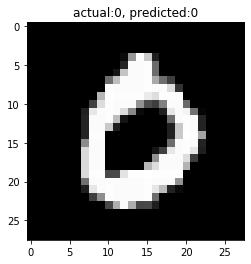

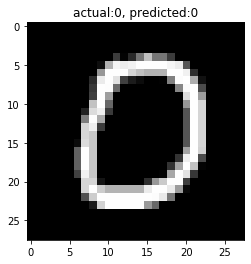

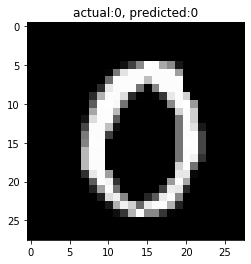

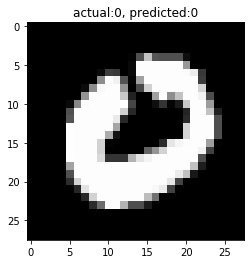

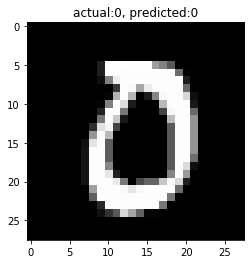

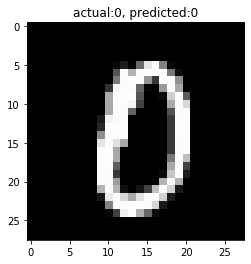

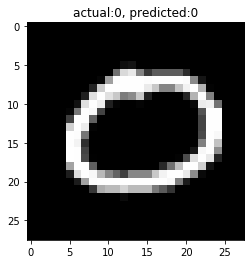

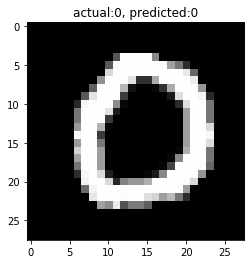

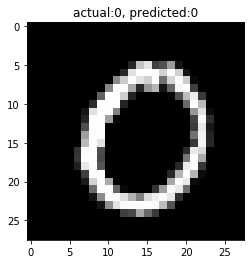

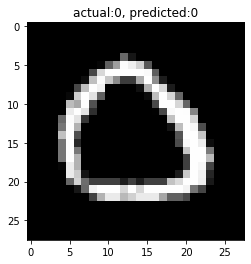

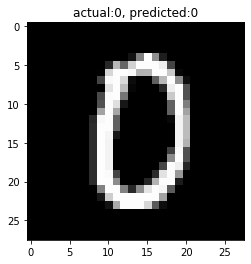

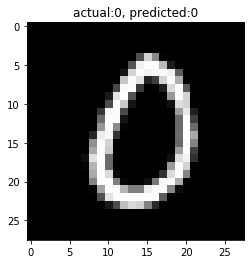

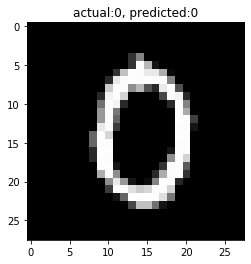

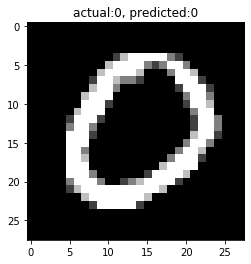

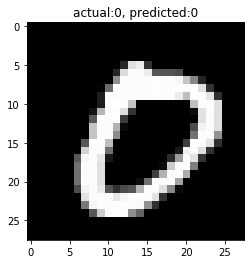

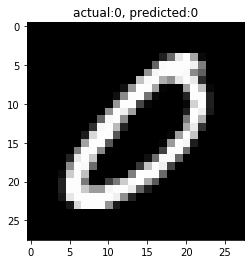

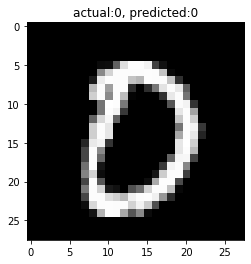

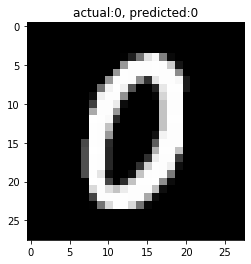

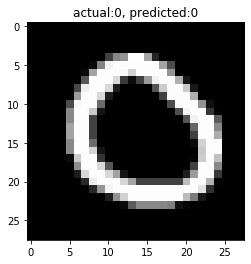

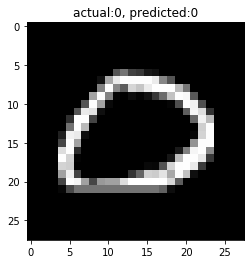

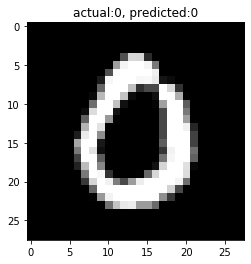

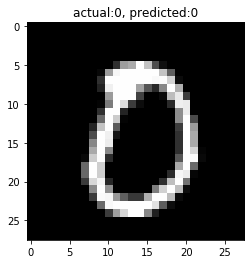

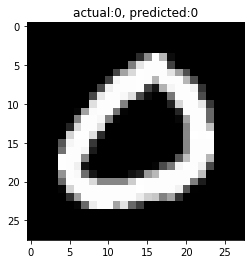

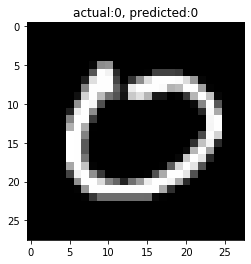

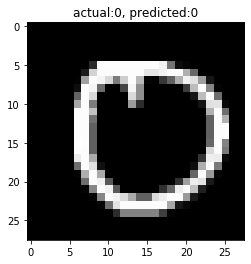

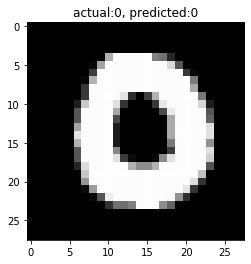

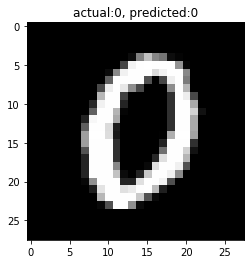

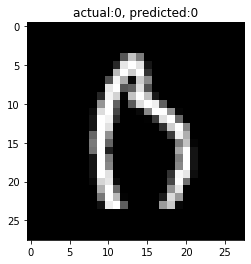

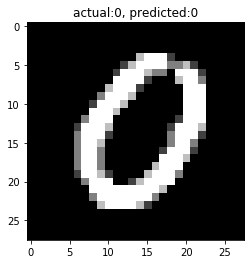

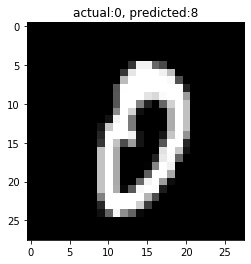

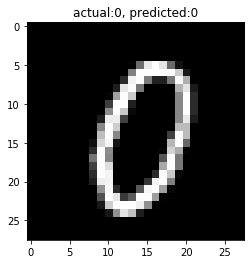

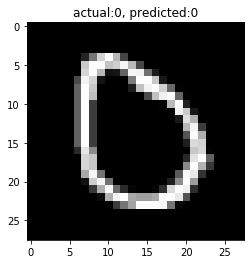

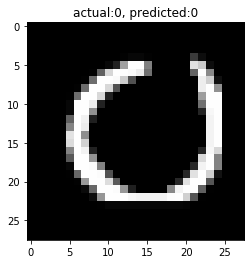

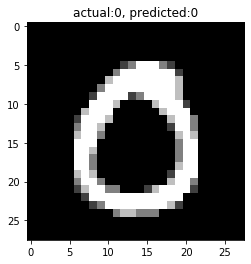

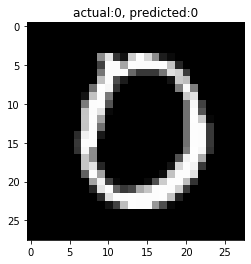

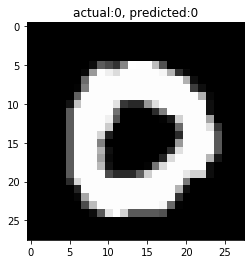

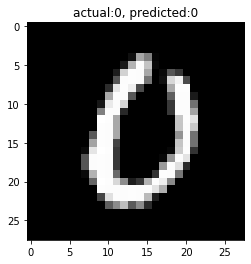

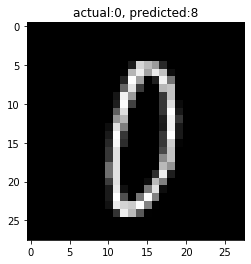

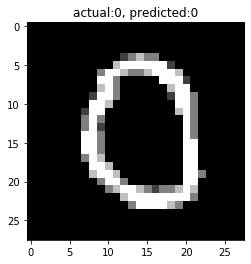

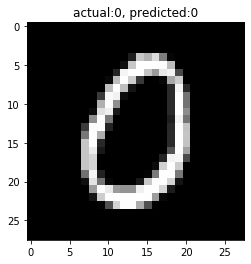

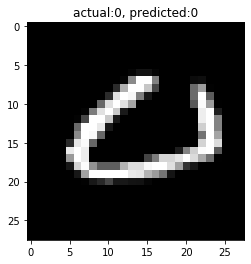

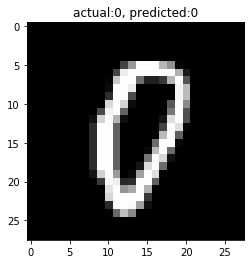

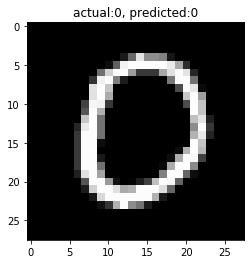

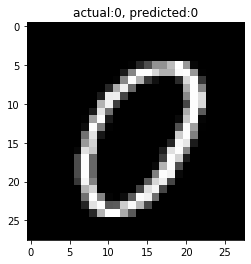

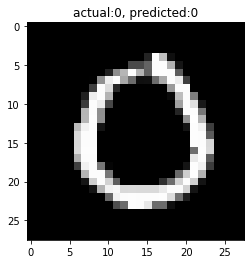

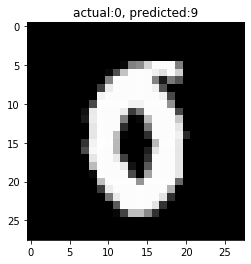

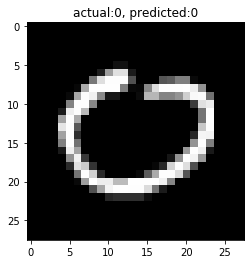

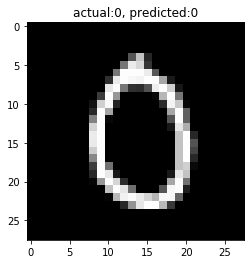

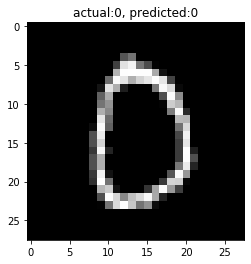

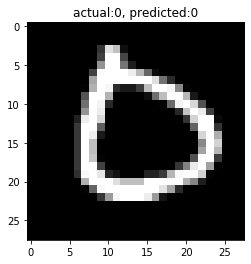

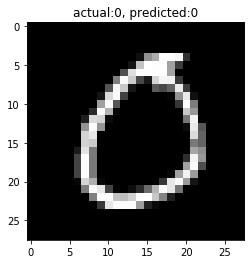

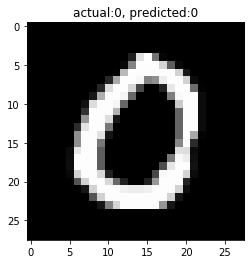

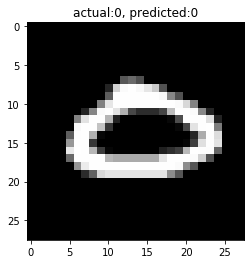

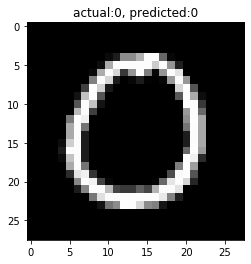

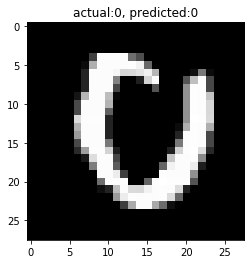

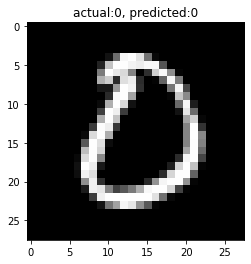

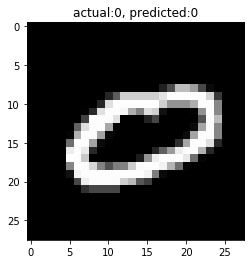

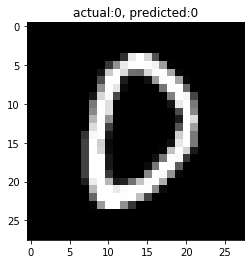

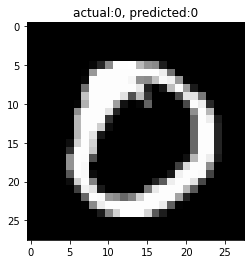

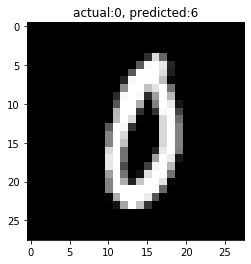

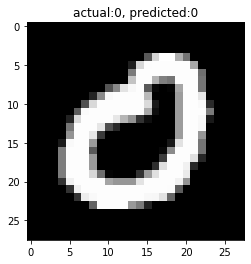

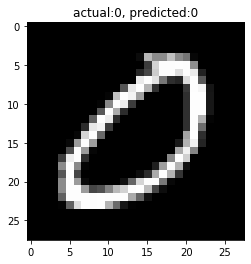

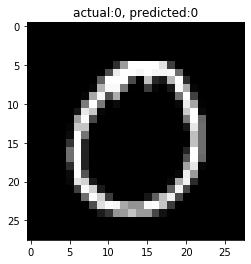

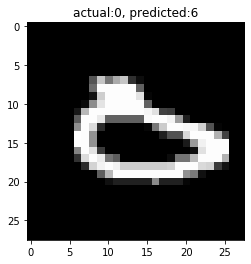

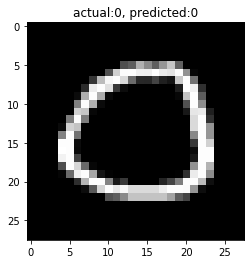

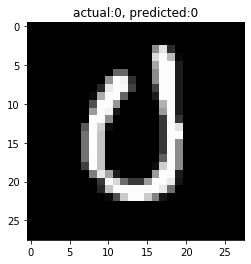

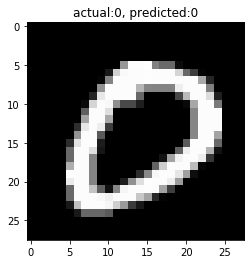

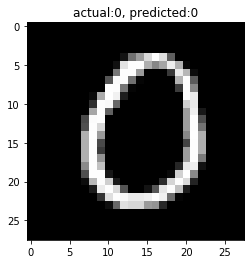

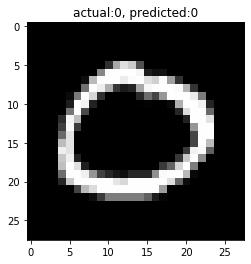

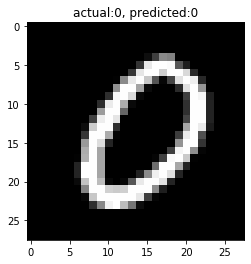

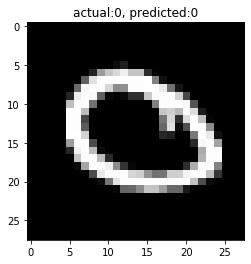

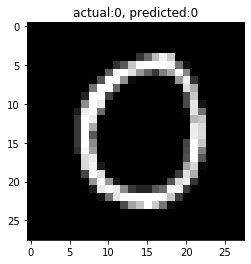

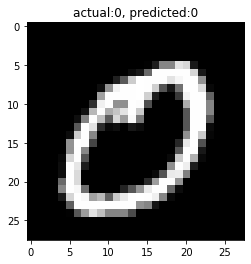

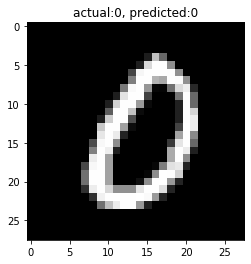

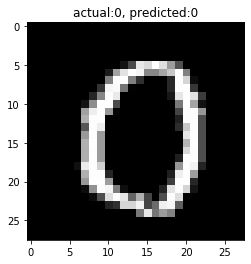

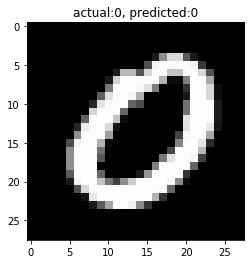

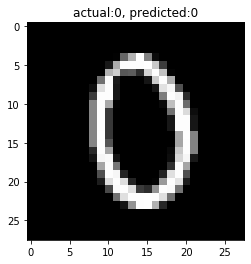

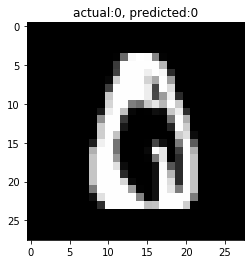

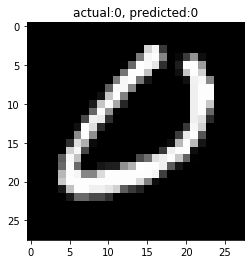

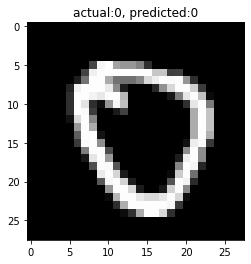

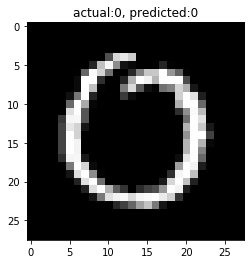

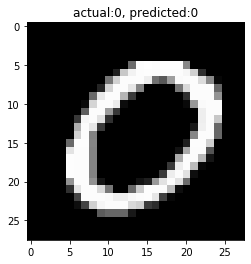

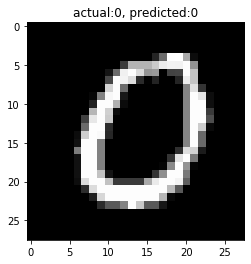

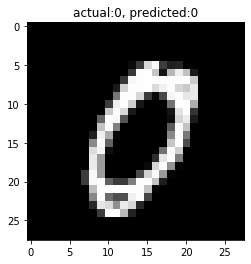

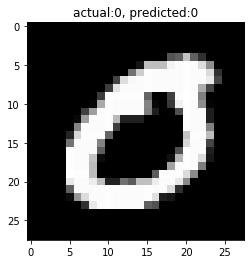

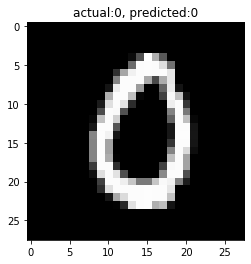

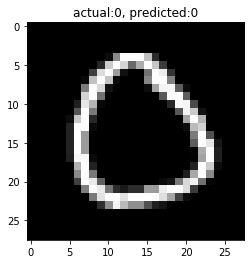

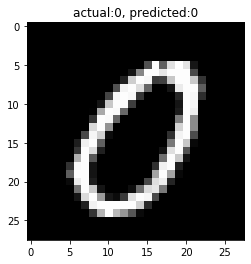

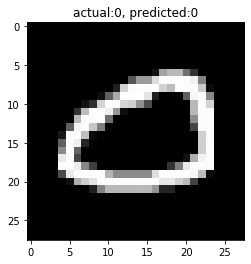

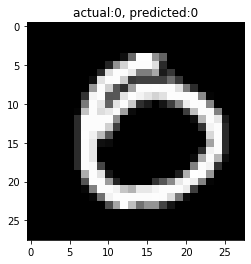

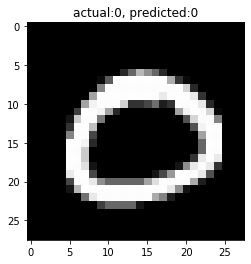

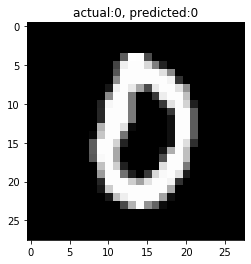

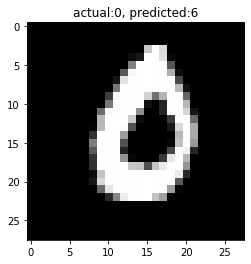

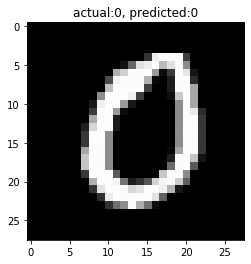

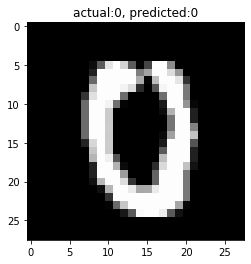

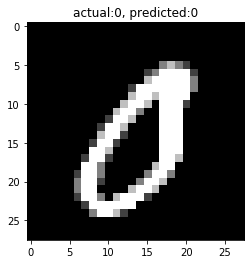

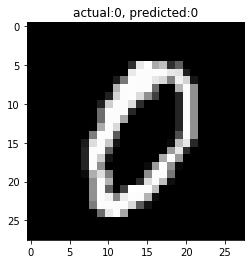

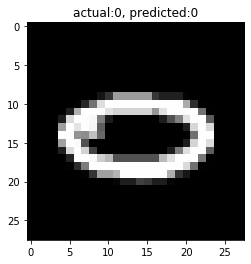

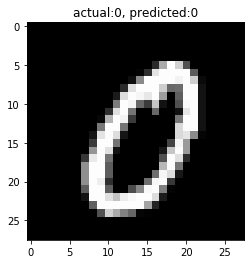

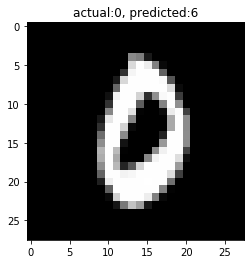

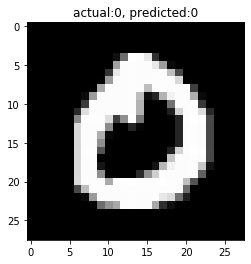

In [17]:
#displaying test images with predicted label
for ind,(im,ya,yp) in enumerate(zip(x_val,y_val_int,y_pred_int)):
    plt.imshow(im[:,:,0],cmap='gray')
    plt.title("actual:{}, predicted:{}".format(ya,yp))
    plt.savefig("result_images/image_{:06d}_actual_{}_predicted_{}".format(ind,ya,yp))
    plt.show()
    if ind == 100:
        break
   
    